In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable


np.random.seed(0)

a = np.random.random(4) 
#a = np.array([-1.0, 6.0, -1.0, -1.0, -1.0, 0, 0, 0])
a /= np.sqrt(np.sum(np.abs(a) ** 2))

a = torch.tensor(a)

In [2]:
num_qubits = 2
dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev, interface='torch')
def circuit(params):
    qml.RY(params[0], wires=[0])
    qml.RY(params[1], wires=[1])
    qml.CNOT(wires=[0, 1])
    qml.RY(params[2], wires=[1])
    
    return qml.state()

In [3]:
def loss(a,prediction):
    total_loss = torch.norm(a-prediction)**2
    return total_loss

#Define cost function
def cost(a,params):
    prediction = circuit(params)
    cost = loss(a,prediction)
    return cost

In [4]:
params =np.array([0.1, 0.1, 0.1])

params = Variable(torch.tensor(params), requires_grad=True)

In [5]:
opt = torch.optim.LBFGS([params], lr=0.1)

In [6]:
steps = 10

In [11]:
def closure():
    opt.zero_grad()
    loss = cost(a, params)
    loss.backward()
    return loss

y = []
for i in range(steps): 
    y.append(opt.step(closure))

In [12]:
x =  [i for i in range(0, 10)]

y_2q = [i.detach().numpy() for i in y]

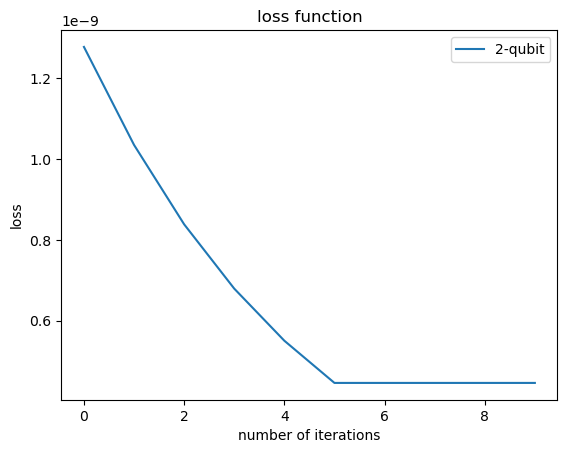

In [14]:
plt.plot(x, y_2q, label = "2-qubit")
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.title('loss function')
plt.legend()
plt.show()